# H. elogonata functional genomics analysis

The following experiment was carried out:

1. The H. elongata genome was "tagmented", i.e., fragmented with a transposase with each fragment flanked by tags, which in this case, are homology arms to aide downstream plasmid cloning with Gibson assembly. The two tags for Gibson assembly are fixed.
2. Inserts were then cloned into a KanR plasmid and transformed into E. coli
3. Transformants were then pooled together and placed in a 4% salt solution with measurements (long read plasmid sequencing) taken every 24 hours (after an initial growth step of 24 hours in normal media with kanamycin to ensure only plasmids with the insert remain)

At the end of this experiment, we should have plasmids that correspond to regions of the H. elongata genome that confer salt tolerance to the E. coli.

Because we are doing whole plasmid sequencing each read ought to represent a single plasmid with an insert. Our strategy to quickly look at the functional characteristics of these inserts are:

1. Find reads that contain the homology arms
2. Extract the insert sequence in between the homology arms—this ought to be a genomic region from H. elongata
3. Map the insert to the H. elongata genome (obtained from NCBI)
4. Find the overlap between the genomic positions each insert maps to and the NCBI-derived annotation file

Although this relies on the annotation pipeline used by NCBI (PGAP), this gives us a quick view to the rough functional characteristics of the inserts for each measurement.

## Pipeline

For convenience and speed, a quick Snakemake pipeline was created to do these sequence operations on all the measurements:

![dag](dag.png)

The following software was used:

1. [NCBI Datasets](https://www.ncbi.nlm.nih.gov/datasets/) to grab the genome
2. [nanoq](https://github.com/esteinig/nanoq) for rapid Nanopore QC
3. [cutadapt](https://cutadapt.readthedocs.io/en/stable/) for "trimming" reads to get inserts
4. [seqtk](https://github.com/lh3/seqtk) for simple fastx file manipulation
5. [minimap2](https://github.com/lh3/minimap2) for long read alignment
6. [samtools](https://www.htslib.org/) to manipulate alignment files
7. [bedtools](https://bedtools.readthedocs.io/en/latest/) for genomic-coordinate (i.e., overlap between insert alignment and GFF) analysis

The final file created will be of the form `{measurement}.overlaps.bed`, a tab-delimited file that has the overlaps between the genomic insert and the GFF file.

# Analysis

This final file allows us to look at:

1. The products encoded by the genomic insert
2. The size of the insert to see if our transposon concentration was okay
3. The location of the insert to see if the transposon prefers a certain location or not

For convenience, this is the metadata associated with these measurements:

| Starting stock  | Sample 0 (no selection) | Sample 1 (1 overnight of 4% salt selection) | Sample 2 (2 overnights of 4% salt selection) | Sample 3 (3 overnights of 4% salt selection) | Sample 4 (4 overnights of 4% salt selection) | Sample 5 (5 overnights of 4% salt selection) |
|----------------|------------------------|-------------------------------------------|-------------------------------------------|-------------------------------------------|-------------------------------------------|-------------------------------------------|
| s.Ec.C.00348  | m.S.00167              | m.S.00179                                | m.S.00191                                | m.S.00203                                | m.S.00215                                | m.S.00227                                |
| s.Ec.C.00349  | m.S.00171              | m.S.00183                                | m.S.00195                                | m.S.00207                                | m.S.00219                                | m.S.00231                                |
| s.Ec.C.00350  | m.S.00175              | m.S.00187                                | m.S.00199                                | m.S.00211                                | m.S.00223                                | m.S.00235                                |

# Control samples

We don't expect to see anything. This analysis is a little messy because 

In [17]:
from glob import glob
import sys
sys.path.append('scripts')

from gff_analysis import analyze_samples

control_files = [
    'output/overlaps/YCZ4B8_1_m.S.00167.overlaps.bed',
    # 'output/overlaps/YCZ4B8_1_m.S.00179.overlaps.bed',  # Empty well in the gel
    # 'output/overlaps/YCZ4B8_1_m.S.00191.overlaps.bed',  # Empty well in the gel
    # 'output/overlaps/YCZ4B8_1_m.S.00203.overlaps.bed',  # Empty well in the gel
    'output/overlaps/YCZ4B8_13_m.S.00215.overlaps.bed',
    'output/overlaps/YCZ4B8_16_m.S.00227.overlaps.bed',
]
analyze_samples(
    sample_files=control_files,
    report_dir='reports',
    organism_name="H. elongata",
    show_plots=True
)



Processing 3 sample overlap files...
  Processing YCZ4B8_1_m.S.00167.overlaps.bed...
  Processing YCZ4B8_13_m.S.00215.overlaps.bed...
  Processing YCZ4B8_16_m.S.00227.overlaps.bed...

Analysis complete! All outputs saved to reports


""


# Library 1

Two variants of the library were constructed.


Processing 6 sample overlap files...
  Processing YCZ4B8_2_m.S.00171.overlaps.bed...
    Saved to reports/assembly1/YCZ4B8_2_m.S.00171.overlaps_overlaps.csv
    Found 64 CDS overlaps
    Unique reads: 42
    Unique products: 50
Saved overlap plot to reports/assembly1/YCZ4B8_2_m.S.00171.overlaps_Read-CDS_Overlap_Summary.png
  Processing YCZ4B8_5_m.S.00183.overlaps.bed...
Error processing output/overlaps/YCZ4B8_5_m.S.00183.overlaps.bed: [Errno 2] No such file or directory: 'output/overlaps/YCZ4B8_5_m.S.00183.overlaps.bed'
  Processing YCZ4B8_8_m.S.00195.overlaps.bed...
    Saved to reports/assembly1/YCZ4B8_8_m.S.00195.overlaps_overlaps.csv
    Found 77 CDS overlaps
    Unique reads: 32
    Unique products: 5
Saved overlap plot to reports/assembly1/YCZ4B8_8_m.S.00195.overlaps_Read-CDS_Overlap_Summary.png
  Processing YCZ4B8_11_m.S.00207.overlaps.bed...
    Saved to reports/assembly1/YCZ4B8_11_m.S.00207.overlaps_overlaps.csv
    Found 32 CDS overlaps
    Unique reads: 14
    Unique produc

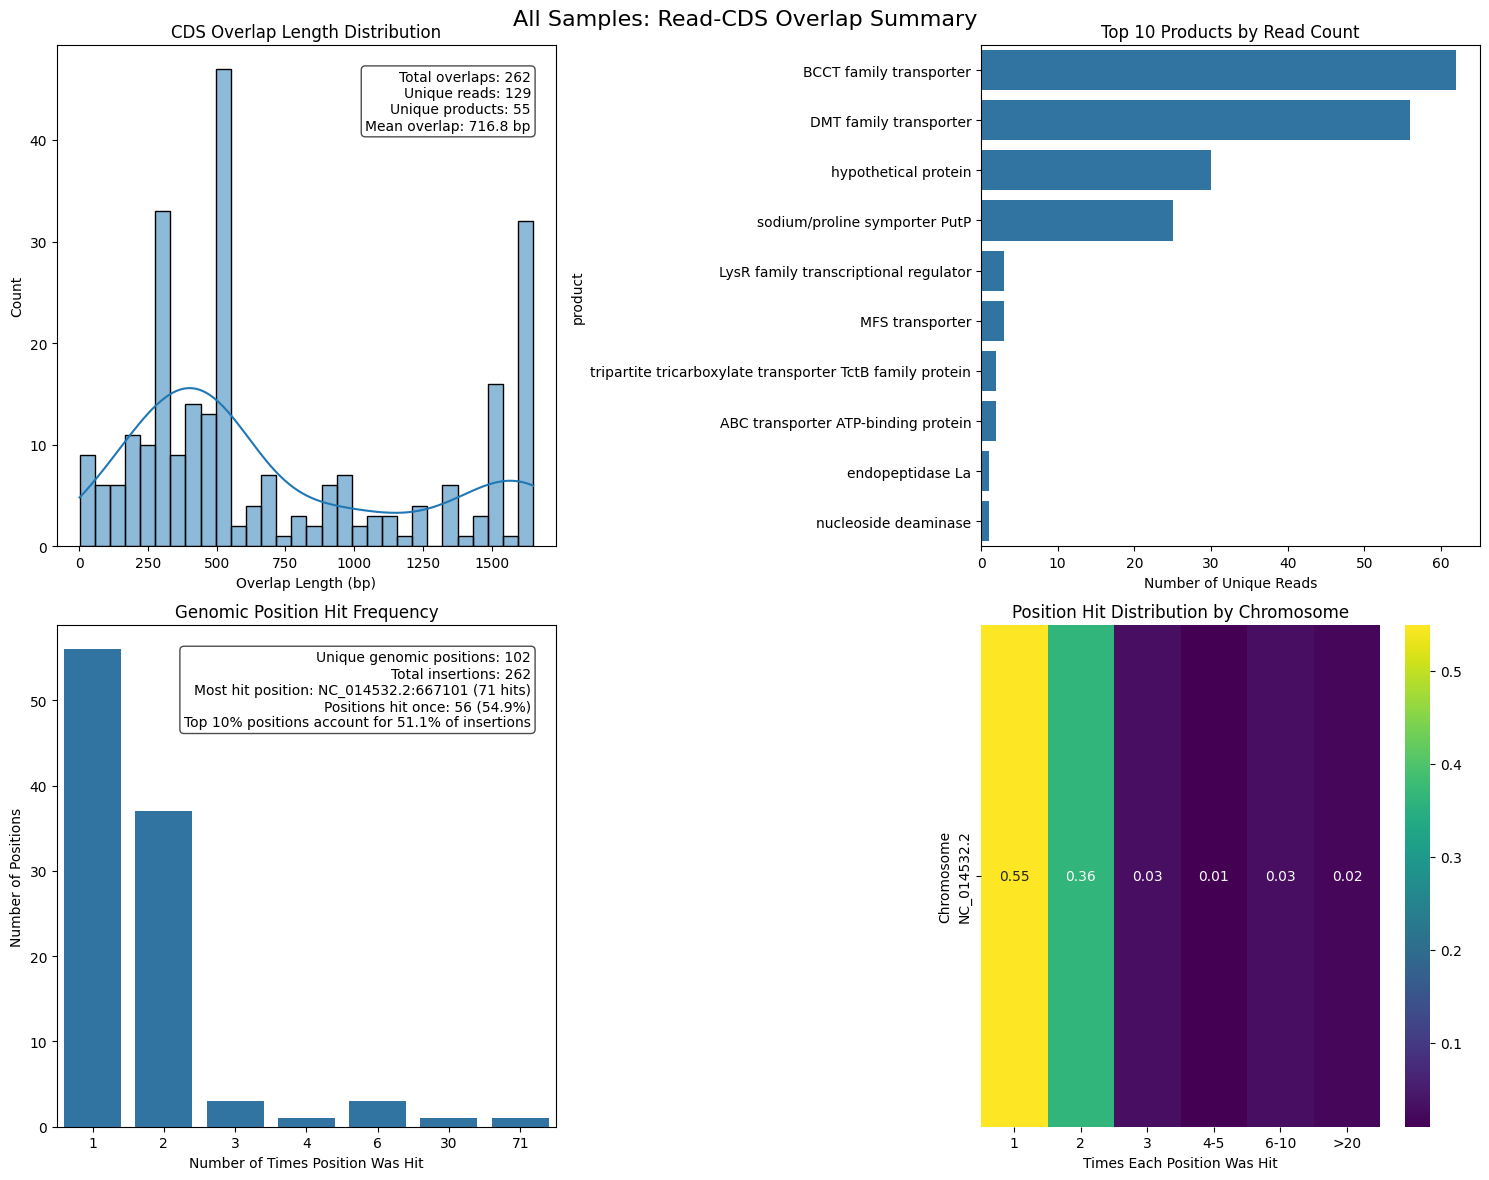

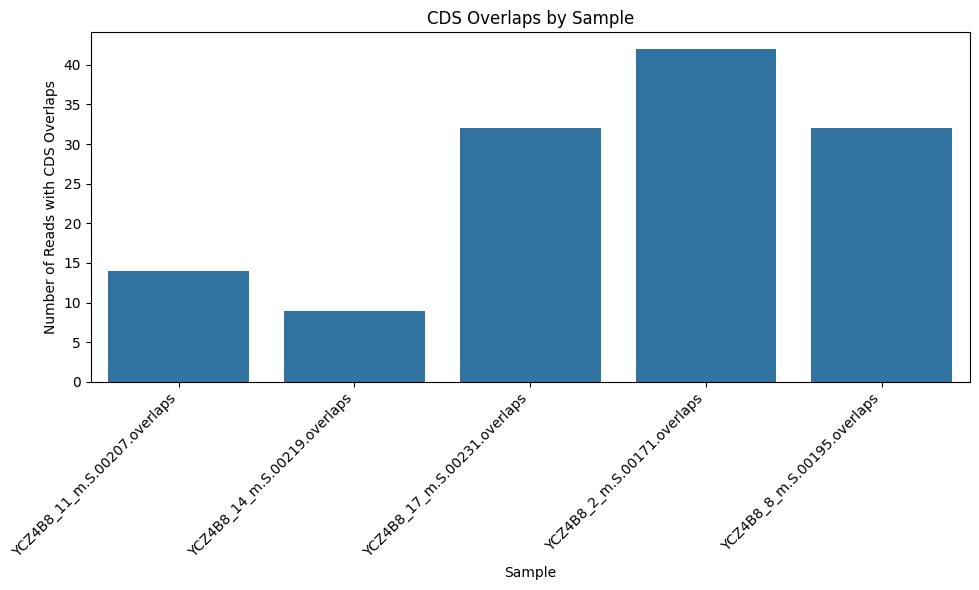


Analysis complete! All outputs saved to reports/assembly1


,read_name,chrom,start,end,strand,gff_start,gff_end,gff_strand,product,overlap_bp,sample
1,7_YCZ4B8_2,NC_014532.2,257058,258047,+,256703,257476,-,FCD domain-containing protein,418,YCZ4B8_2_m.S.00171.overlaps
3,7_YCZ4B8_2,NC_014532.2,257058,258047,+,257783,258937,+,FMN-dependent L-lactate dehydrogenase LldD,265,YCZ4B8_2_m.S.00171.overlaps
9,18_YCZ4B8_2,NC_014532.2,264062,265244,+,265061,266044,+,biotin--[acetyl-CoA-carboxylase] ligase,184,YCZ4B8_2_m.S.00171.overlaps
15,60_YCZ4B8_2,NC_014532.2,464064,464765,+,463853,464377,-,YgjV family protein,313,YCZ4B8_2_m.S.00171.overlaps
17,60_YCZ4B8_2,NC_014532.2,464064,464765,+,464438,466087,-,acyl-CoA dehydrogenase family protein,328,YCZ4B8_2_m.S.00171.overlaps
...,...,...,...,...,...,...,...,...,...,...,...
168,11_YCZ4B8_17,NC_014532.2,924705,926271,+,924722,926212,-,sodium/proline symporter PutP,1491,YCZ4B8_17_m.S.00231.overlaps
171,16_YCZ4B8_17,NC_014532.2,925100,925985,-,924722,926212,-,sodium/proline symporter PutP,885,YCZ4B8_17_m.S.00231.overlaps
174,36_YCZ4B8_17,NC_014532.2,925155,926271,-,924722,926212,-,sodium/proline symporter PutP,1057,YCZ4B8_17_m.S.00231.overlaps
177,4_YCZ4B8_17,NC_014532.2,925157,926271,-,924722,926212,-,sodium/proline symporter PutP,1055,YCZ4B8_17_m.S.00231.overlaps


In [18]:
assembly1_files = [
    'output/overlaps/YCZ4B8_2_m.S.00171.overlaps.bed',
    'output/overlaps/YCZ4B8_5_m.S.00183.overlaps.bed',
    'output/overlaps/YCZ4B8_8_m.S.00195.overlaps.bed',
    'output/overlaps/YCZ4B8_11_m.S.00207.overlaps.bed',
    'output/overlaps/YCZ4B8_14_m.S.00219.overlaps.bed',
    'output/overlaps/YCZ4B8_17_m.S.00231.overlaps.bed',
]
analyze_samples(
    sample_files=assembly1_files,
    report_dir='reports/assembly1',
    organism_name="H. elongata",
    show_plots=True
)


# Library 2


Processing 6 sample overlap files...
  Processing YCZ4B8_3_m.S.00175.overlaps.bed...
    Saved to reports/assembly2/YCZ4B8_3_m.S.00175.overlaps_overlaps.csv
    Found 50 CDS overlaps
    Unique reads: 26
    Unique products: 43
Saved overlap plot to reports/assembly2/YCZ4B8_3_m.S.00175.overlaps_Read-CDS_Overlap_Summary.png
  Processing YCZ4B8_6_m.S.00187.overlaps.bed...
Error processing output/overlaps/YCZ4B8_6_m.S.00187.overlaps.bed: [Errno 2] No such file or directory: 'output/overlaps/YCZ4B8_6_m.S.00187.overlaps.bed'
  Processing YCZ4B8_9_m.S.00199.overlaps.bed...
    Saved to reports/assembly2/YCZ4B8_9_m.S.00199.overlaps_overlaps.csv
    Found 14 CDS overlaps
    Unique reads: 7
    Unique products: 4
Saved overlap plot to reports/assembly2/YCZ4B8_9_m.S.00199.overlaps_Read-CDS_Overlap_Summary.png
  Processing YCZ4B8_12_m.S.00211.overlaps.bed...
    Saved to reports/assembly2/YCZ4B8_12_m.S.00211.overlaps_overlaps.csv
    Found 36 CDS overlaps
    Unique reads: 15
    Unique product

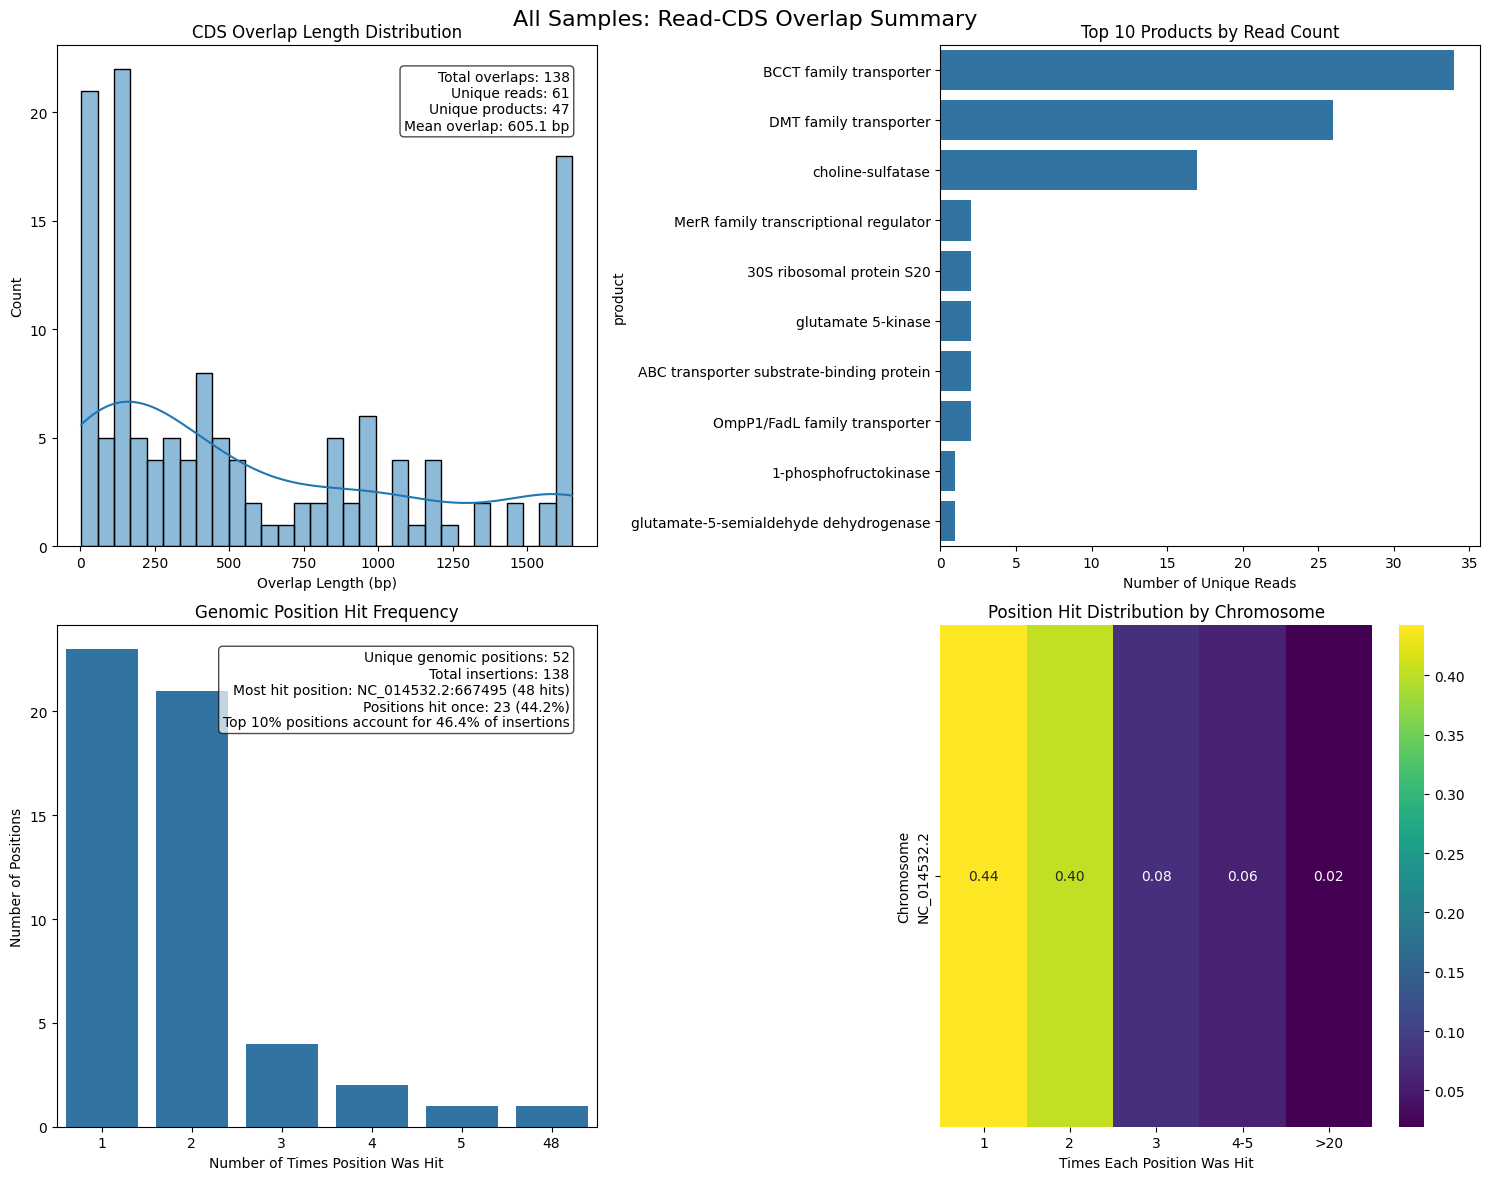

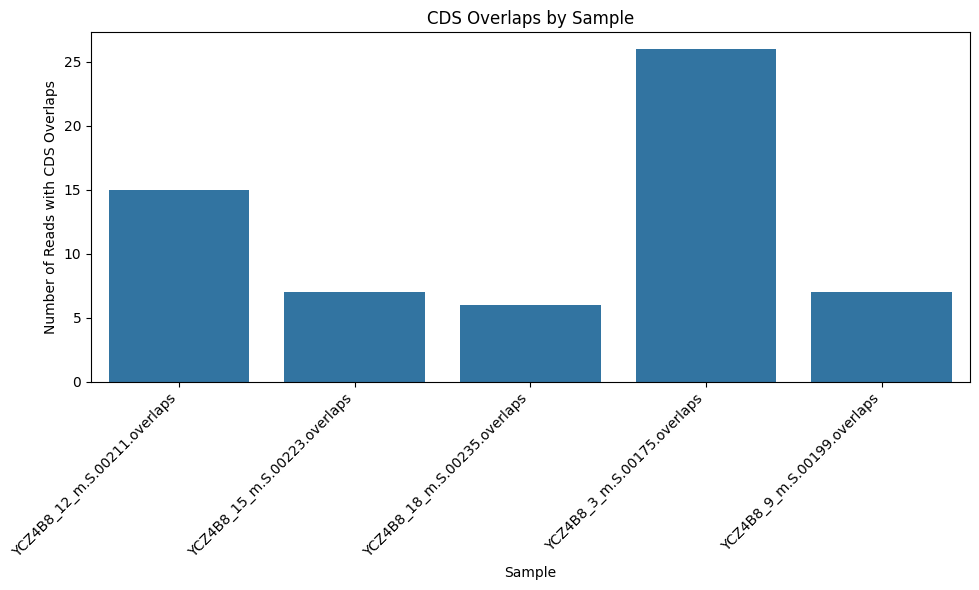


Analysis complete! All outputs saved to reports/assembly2


,read_name,chrom,start,end,strand,gff_start,gff_end,gff_strand,product,overlap_bp,sample
1,33_YCZ4B8_3,NC_014532.2,251857,252754,-,250740,252080,+,sodium-dependent transporter,223,YCZ4B8_3_m.S.00175.overlaps
3,33_YCZ4B8_3,NC_014532.2,251857,252754,-,252097,252645,+,gamma carbonic anhydrase family protein,549,YCZ4B8_3_m.S.00175.overlaps
6,33_YCZ4B8_3,NC_014532.2,252780,253021,-,252758,253429,+,metal-dependent hydrolase,241,YCZ4B8_3_m.S.00175.overlaps
9,44_YCZ4B8_3,NC_014532.2,302978,305363,-,302762,303379,+,single-stranded DNA-binding protein,401,YCZ4B8_3_m.S.00175.overlaps
11,44_YCZ4B8_3,NC_014532.2,302978,305363,-,303464,304630,-,arylamine N-acetyltransferase,1167,YCZ4B8_3_m.S.00175.overlaps
...,...,...,...,...,...,...,...,...,...,...,...
32,2_YCZ4B8_18,NC_014532.2,667643,669568,-,669563,671095,-,choline-sulfatase,6,YCZ4B8_18_m.S.00235.overlaps
35,0_YCZ4B8_18,NC_014532.2,667803,669554,-,667718,669367,-,BCCT family transporter,1564,YCZ4B8_18_m.S.00235.overlaps
38,9_YCZ4B8_18,NC_014532.2,668567,669574,-,667718,669367,-,BCCT family transporter,800,YCZ4B8_18_m.S.00235.overlaps
40,9_YCZ4B8_18,NC_014532.2,668567,669574,-,669563,671095,-,choline-sulfatase,12,YCZ4B8_18_m.S.00235.overlaps


In [19]:

assembly2_files = [
    'output/overlaps/YCZ4B8_3_m.S.00175.overlaps.bed',
    'output/overlaps/YCZ4B8_6_m.S.00187.overlaps.bed',
    'output/overlaps/YCZ4B8_9_m.S.00199.overlaps.bed',
    'output/overlaps/YCZ4B8_12_m.S.00211.overlaps.bed',
    'output/overlaps/YCZ4B8_15_m.S.00223.overlaps.bed',
    'output/overlaps/YCZ4B8_18_m.S.00235.overlaps.bed'
]

analyze_samples(
    sample_files=assembly2_files,
    report_dir='reports/assembly2',
    organism_name="H. elongata",
    show_plots=True
)


# Conclusions

It is heartening to see inserts code for many transporters! A first approximation of how a cell would deal with high levels of salt would be to shuttle salt out and import osmoprotectants. Particularly heartening was the BCCT transporter, since betanine serves as an osmoprotectant. Choline is also related to betaine, so the choline sulfatase makes sense.

Proline has also been reported to play a role in salt tolerance, making the glutamate 5-kinase and glutamate 5-semialdohyde dehydrogenase (the first two steps of proline biosynthesis from glutamate) encouraging hits.

# Future Improvements/Next Steps

* If it is true that `# transformants == # number of plasmid reads == number of inserts` then I would expect far more reads overall. I am unsure if this data was intentionally down-sampled to make a better takehome assignment or if this is a fundamental limit of Plasmidsaurus——for the intended usage of the service (which is presumably a single plasmid species), 50x coverage would be more than sufficient but is not deep enough for our purpose
* From the Plasmidsaurus-provided histograms, there appear to be a lot of E. coli reads. I am actually unsure what the typical (practical) amount of host reads are for an experiment like this. Is there room to improve plasmid extraction?
* If it is true that the sequencing depth is a fundamental limitation of Plasmidsaurus and that we do expect far more reads, we should either ask Plasmidsaurus if we can sequence at higher depths and in absence of that, a short read approach could help us see the full diversity of inserts we start with.
* The problem prompt doesn't mention plasmid-level barcodes, but I think more recent techniques from Pioneer Labs utilize Boba-Seq which do——this would be helpful in tracking inserts over time.
* I do see inserts with the control samples... although they do not map to the H. elongata genome? I would investigate this further in real life, perhaps it is a bug on my end.
* Doing `seqkit stats output/inserts/*.fasta` shows average insert lengths between 1.7-5k. Is this too large? The rule of thumb for prokaryotic gene sizes are ~1kbp, so we might have room to increase concentration of transposon.